In [67]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import mplfinance
from mplfinance import candlestick_ohlc

In [68]:
conda install -c conda-forge mplfinance

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gozde\anaconda3

  added / updated specs:
    - mplfinance


The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_2


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [69]:
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gozde\anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.10.3-py38haa244f~ --> pkgs/main::conda-4.10.3-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas_datareader.data as web

In [93]:
from matplotlib import pyplot as plt

In [94]:
plt.style.use('ggplot')

In [95]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [96]:
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head())

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222


In [97]:
df.to_csv('tsla.csv')

In [98]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
print(df.head())

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222


In [99]:
print(df[['Open', 'High']].head())

             Open   High
Date                    
2010-06-29  3.800  5.000
2010-06-30  5.158  6.084
2010-07-01  5.000  5.184
2010-07-02  4.600  4.620
2010-07-06  4.000  4.000


<AxesSubplot:xlabel='Date'>

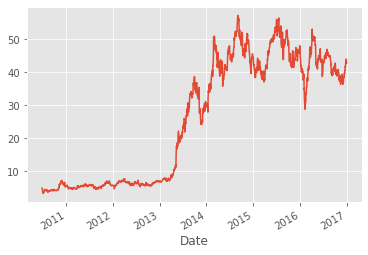

In [100]:
df['Adj Close'].plot()

In [101]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,4.199600


In [102]:
df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222,4.199600


<BarContainer object of 1640 artists>

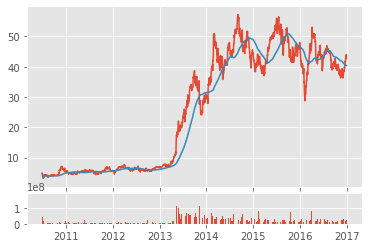

In [112]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])



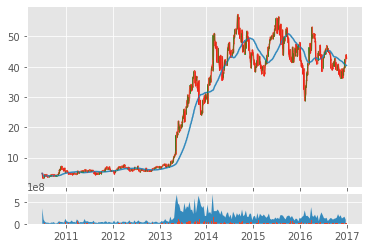

In [115]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.head()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()
